# 电影评论分类
### Step 1：加载IMDB数据集

In [5]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

# num_words 仅保留训练数据前10000最常出现的词

train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '') for i in train_data[0]])

decoded_review

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

### Step 2：准备数据

In [9]:
import numpy as np 

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension ))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32') 

x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

### Step 3：模型定义

In [1]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Step 4：编译模型

In [2]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Step 5：设置验证集

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Step 6：训练模型

In [11]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 5s 58ms/step - loss: 0.5119 - accuracy: 0.7847 - val_loss: 0.3829 - val_accuracy: 0.8672
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3041 - accuracy: 0.9047 - val_loss: 0.3135 - val_accuracy: 0.8809
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2249 - accuracy: 0.9270 - val_loss: 0.2899 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1773 - accuracy: 0.9432 - val_loss: 0.2742 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1436 - accuracy: 0.9543 - val_loss: 0.2779 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1205 - accuracy: 0.9623 - val_loss: 0.2938 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0987 - accuracy: 0.9709 - val_loss: 0.3702 - val_accuracy: 0.8665
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Step 7：绘制训练损失和验证损失

In [12]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

epochs

range(1, 21)

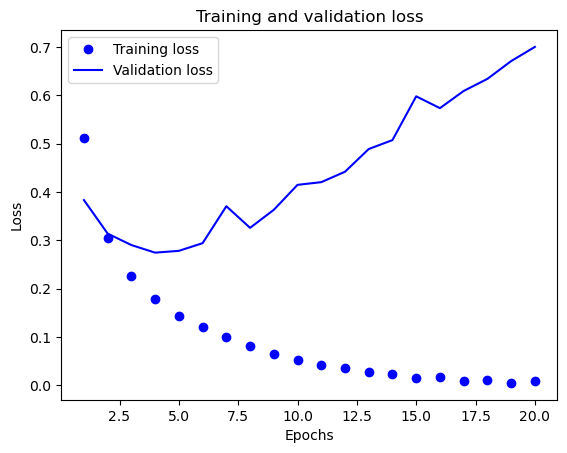

In [13]:
# 'bo'表示蓝色圆点，'b'表示蓝色实线
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Step 8：绘制训练精度和验证精度

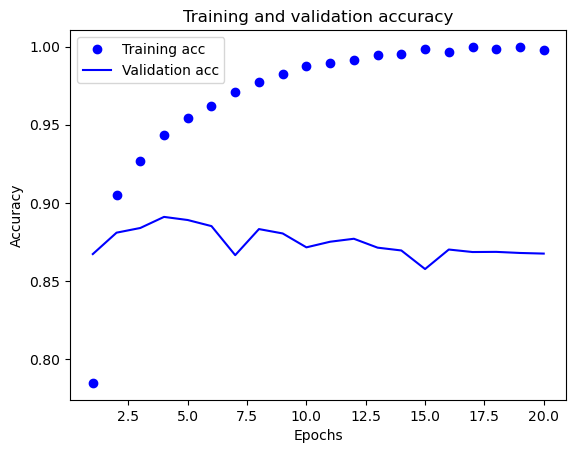

In [15]:
# 清空图像
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Step 9：测试集结果

In [16]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 2ms/step - loss: 0.7639 - accuracy: 0.8516


[0.7638517022132874, 0.851639986038208]

In [17]:
model.predict(x_test)

782/782 [==============================] - 6s 1ms/step


array([[0.00292584],
       [0.99999976],
       [0.9896593 ],
       ...,
       [0.00206949],
       [0.00521207],
       [0.96120864]], dtype=float32)